/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


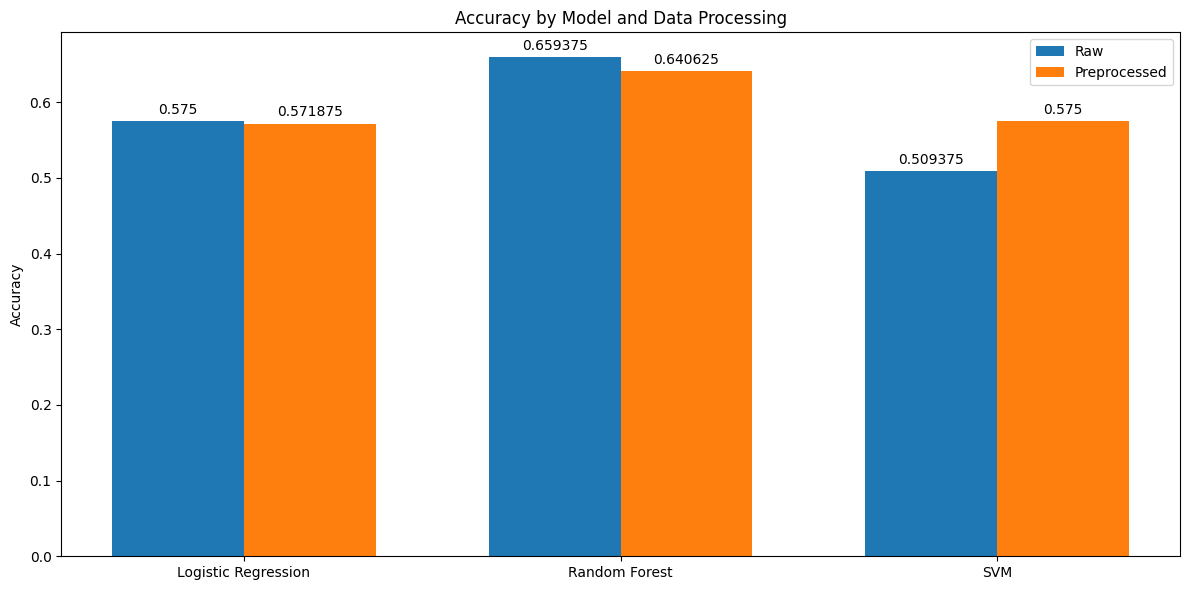

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

# Load the dataset
data_frame = pd.read_csv('winequality-red.csv')
features = data_frame.drop('quality', axis=1).columns.tolist()
X_red, y_red = data_frame[features], data_frame['quality']

# Apply log transformation and standard scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('log_transform', FunctionTransformer(np.log1p), features),
        ('std_scaler', StandardScaler(), features)
    ]
)
X_processed = preprocessor.fit_transform(X_red)

# Split the raw data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# Split the preprocessed data
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(X_processed, y_red, test_size=0.2, random_state=42)

# Define the models
models = {
    #"Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Function to train and evaluate models
def train_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        #if "Linear Regression" in name:
           # score = r2_score(y_test, y_pred)
       # else:
        score = accuracy_score(y_test, y_pred)
        results[name] = score
    return results

# Train and evaluate on raw data
results_raw = train_evaluate(models, X_train_raw, X_test_raw, y_train_raw, y_test_raw)

# Train and evaluate on preprocessed data
results_preprocessed = train_evaluate(models, X_train_pre, X_test_pre, y_train_pre, y_test_pre)

# Plotting the results
labels = list(results_raw.keys())
raw_scores = [results_raw[name] for name in labels]
preprocessed_scores = [results_preprocessed[name] for name in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))  # Increased figure size
rects1 = ax.bar(x - width/2, raw_scores, width, label='Raw')
rects2 = ax.bar(x + width/2, preprocessed_scores, width, label='Preprocessed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Model and Data Processing')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()  # Adjust layout to make room for the legend

plt.show()


[Text(0, 3, '0.424242')]

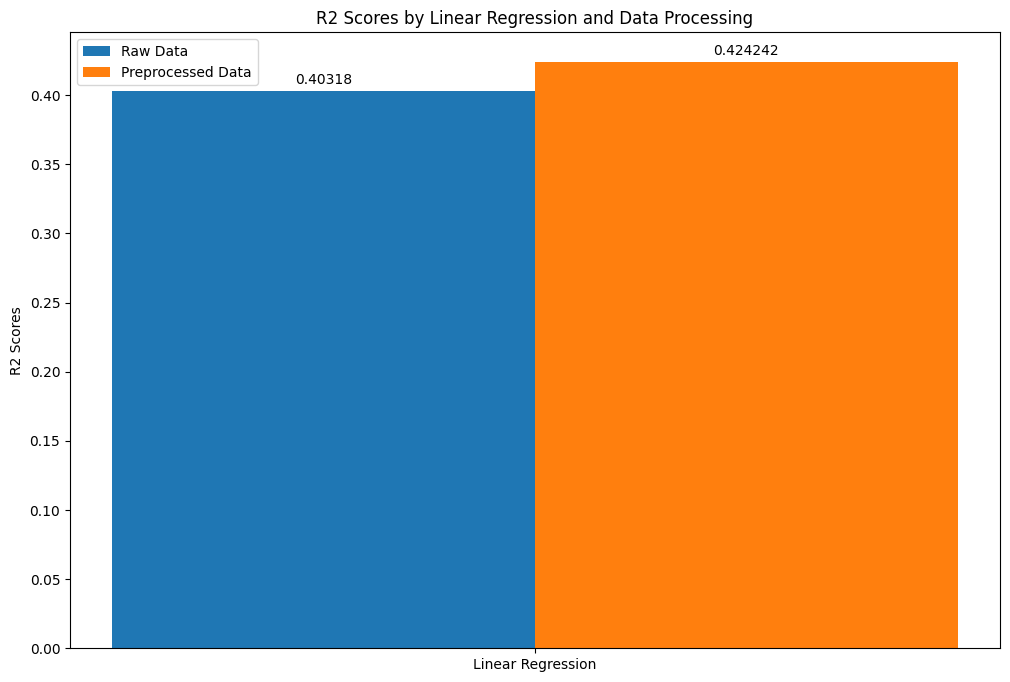

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Using the data based on previous evaluations
results_r2_raw = {'Linear Regression': 0.40318}  # Example R2 score for Linear Regression on raw data
results_r2_pre = {'Linear Regression': 0.424242}  # Example R2 score for Linear Regression on preprocessed data

# Plotting R2 scores for Linear Regression
fig, ax = plt.subplots(figsize=(12, 8))
x_r2 = np.arange(len(results_r2_raw))
width = 0.35
rects1_r2 = ax.bar(x_r2 - width/2, list(results_r2_raw.values()), width, label='Raw Data')
rects2_r2 = ax.bar(x_r2 + width/2, list(results_r2_pre.values()), width, label='Preprocessed Data')
ax.set_ylabel('R2 Scores')
ax.set_title('R2 Scores by Linear Regression and Data Processing')
ax.set_xticks(x_r2)
ax.set_xticklabels(list(results_r2_raw.keys()))
ax.legend()
ax.bar_label(rects1_r2, padding=3)
ax.bar_label(rects2_r2, padding=3)
